# Retail customer segmentation

The aim is to identify target customers for marketing strategies.

https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering#LOADING-DATA
https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering

# Scope
* The data contains customer information from a mall's membership cards: Customer ID, age, gender, annual income, and spending score, a metric based on purchasing behavior. 

# Data exploration

## About the data

The features can be divided into the following four themes:

1. *People:*
* ***ID (nominal):*** Customer's unique identifier
* ***Year_birth (date):*** Birth year
* ***Education (nominal):*** Education level
* ***Marital_Status (nominal):*** Marital status
* ***Income (numerical):*** Annual household income
* ***Kidhome (numerical):*** No. of children in the household
* ***Teenhome (numerical):*** No. of teens in the household
* ***Dt_Customer (date):*** Date of customer's enrolment
* ***Recency (numerical):*** No. of days since last purchase
* ***Complain (nominal/boolean):*** Complained in the last 2 years (1/0 = yes/no)

2. *Products:*
* ***MntWines (numerical):*** Expenditure on wine in last 2 years
* ***MntFruits (numerical):*** Expenditure on fruits in the last 2 years
* ***MntMeatProducts (numerical):*** Expenditure on meat in the last 2 years
* ***MntFishProducts (numerical):*** Expenditure on fish in the last 2 years
* ***MntSweetProducts (numerical):*** Expenditure on sweets in the last 2 years
* ***MntGoldProds (numerical):*** Expenditure on gold in the last 2 years

3. *Promotion:*
* ***NumDealsPurchases (numerical):*** No. of purchases made with a discount
* ***AcceptedCmp1 (nominal/boolean):*** Accepted offer in the 1st campaign (1/0 = yes/no)
* ***AcceptedCmp2 (nominal/boolean):*** Accepted offer in the 2nd campaign (1/0 = yes/no)
* ***AcceptedCmp3 (nominal/boolean):*** Accepted offer in the 3rd campaign (1/0 = yes/no)
* ***AcceptedCmp4 (nominal/boolean):*** Accepted offer in the 4th campaign (1/0 = yes/no)
* ***AcceptedCmp5 (nominal/boolean):*** Accepted offer in the 5th campaign (1/0 = yes/no)
* ***Response (nominal/boolean):*** Accepted offer in the last campaign (1/0 = yes/no)

4. *Place:*
* ***NumWebPurchases (numerical):*** No. of purchases via website
* ***NumCataloguePurchases (numerical):*** No. of purchases via catalogue
* ***NumStorePurchases (numerical):*** No. of purchases in store
* ***NumWebVisitsMonth (numerical):*** No. of visits to website in the last month

## Dependencies

In [1]:
import sys
CONFIG_DIRECTORY = 'C:\\Users\\billy\\OneDrive\\Documents\\Python Scripts\\1. Portfolio\\retail-customer-segmentation\\retail-customer-segmentation'
if CONFIG_DIRECTORY not in sys.path:
    sys.path.insert(0, CONFIG_DIRECTORY)

import ast
import config
import datetime
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-muted')

## Import data

In [2]:
# Source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
raw_df = pd.read_csv(config.file_directory('raw') + 'marketing_campaign.csv', sep ='\t')
raw_df = raw_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
print(f"Number of records: {raw_df.shape[0]}")
raw_df.head(3)

Number of records: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0


## Data types

In [3]:
raw_df.dtypes.value_counts()

int64      23
object      3
float64     1
Name: count, dtype: int64

In [4]:
# Timestamp
raw_df['Dt_Customer'] = pd.to_datetime(raw_df['Dt_Customer'], format='%d-%m-%Y')
# raw_df['Year_Birth'] = pd.to_datetime(raw_df['Year_Birth'], format='%Y')

# Object
raw_df['ID'] = raw_df['ID'].astype(object)

# Boolean
raw_df[['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']] = raw_df[[
    'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].astype('bool')

raw_df.dtypes.value_counts()

int64             15
bool               7
object             3
float64            1
datetime64[ns]     1
Name: count, dtype: int64

## Missing values

In [5]:
raw_df.isnull().sum()[(raw_df.isnull().sum() > 1)]

Income    24
dtype: int64

In [6]:
clean_df = raw_df.copy(deep=True)
clean_df = clean_df.dropna(axis=0, how='any')
clean_df.isnull().sum()[(clean_df.isnull().sum() > 1)]

Series([], dtype: int64)

## Distributions
Date:
* Frequency count

Categorical:
* Unique value count
* Frequency count
* Cramer V correlation

Numerical:
* Box plot
* Cumulative distribution & histogram
* Correlation heat map

### Date variables
Age will be calculated using birth year

*People:*
* ***Year_birth (date):*** Birth year
* ***Dt_Customer (date):*** Date of customer's enrolment

In [7]:
from custom_funcs import perc_func
clean_df['Age'] = 2021 - clean_df['Year_Birth']
clean_df[['Year_Birth', 'Age']].describe()

,Year_Birth,Age
count,2216.000000,2216.000000
mean,1968.820397,52.179603
std,11.985554,11.985554
min,1893.000000,25.000000
25%,1959.000000,44.000000
50%,1970.000000,51.000000
75%,1977.000000,62.000000
max,1996.000000,128.000000


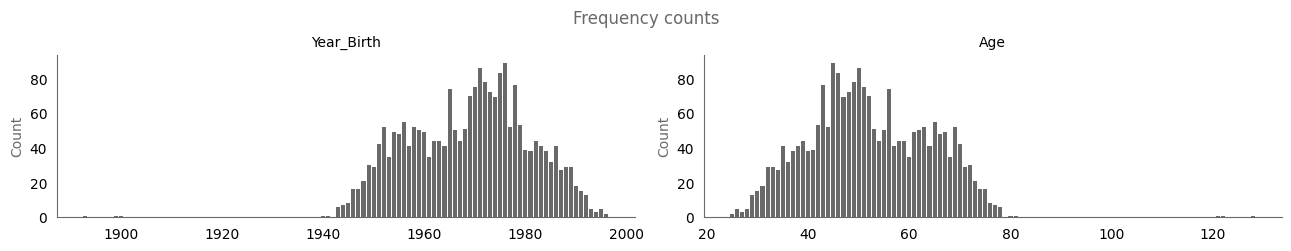

In [8]:
object_cols = ['Year_Birth', 'Age']
fig, axes = plt.subplots(
    nrows=1, ncols=2, constrained_layout=True, figsize=(6.4*2, 4.8/2))
for ax, col in zip(axes, object_cols):
    freq = perc_func(clean_df, col)
    bars = ax.bar(freq.index, freq['count'], color='dimgray')
    ax.set_ylabel('Count', fontsize=10, color='dimgray')
    ax.set_title(f"{col}", fontsize=10)
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')
fig.suptitle('Frequency counts', color='dimgray');

In [9]:
clean_df[['Dt_Customer']].describe()

,Dt_Customer
count,2216
mean,2013-07-10 11:29:27.509025280
min,2012-07-30 00:00:00
25%,2013-01-16 00:00:00
50%,2013-07-08 12:00:00
75%,2013-12-31 00:00:00
max,2014-06-29 00:00:00


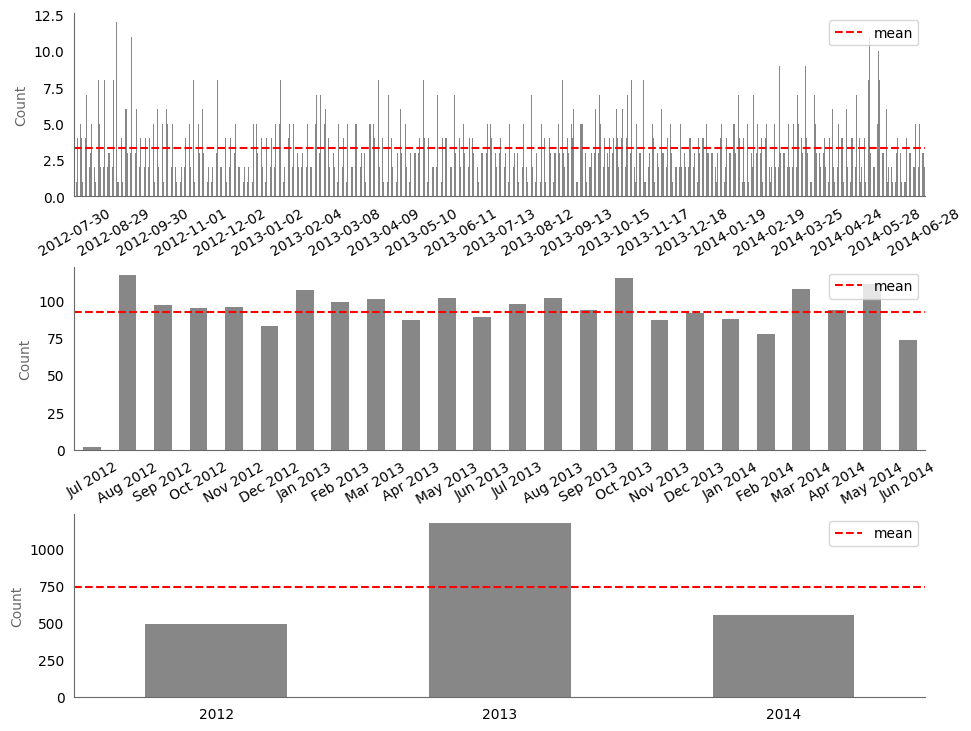

In [10]:
# Calc enrolments per day/month/year
enrols_per_day = clean_df['Dt_Customer'].groupby(clean_df['Dt_Customer']).count()
enrols_per_month = clean_df['Dt_Customer'].groupby([clean_df['Dt_Customer'].dt.year, clean_df['Dt_Customer'].dt.month]).count()
enrols_per_year = clean_df['Dt_Customer'].groupby(clean_df['Dt_Customer'].dt.year).count()

# Plot enrolments per day
fig, axes = plt.subplots(nrows=3, ncols=1, constrained_layout=True, figsize=(6.4*1.5, 4.8*1.5))
enrols_per_day.plot.bar(ax=axes[0], color='dimgray', alpha=0.8, label='')
axes[0].axhline(enrols_per_day.mean(), linestyle='--', color='red', label='mean')
xtick_labels = axes[0].get_xticklabels()[::30]
xtick_positions = [x.get_position()[0] for x in xtick_labels]
xtick_labels = [x.get_text()[:10] for x in xtick_labels]
axes[0].set_xticks(xtick_positions, xtick_labels)
axes[0].set_xticklabels(xtick_labels, rotation=30)

# Plot enrolments per year/month
enrols_per_month.plot.bar(ax=axes[1], color='dimgray', alpha=0.8, label='')
axes[1].axhline(enrols_per_month.mean(), linestyle='--', color='red', label='mean')
xtick_labels = [item.get_text() for item in axes[1].get_xticklabels()]
xtick_labels = [ast.literal_eval(label) for label in xtick_labels]
dates = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
xtick_labels = [dates[label[1]] + " " + str(label[0]) for label in xtick_labels]
axes[1].set_xticklabels(xtick_labels, rotation=30);

# Plot enrolments per year
enrols_per_year.plot.bar(ax=axes[2], color='dimgray', alpha=0.8, label='')
axes[2].axhline(enrols_per_year.mean(), linestyle='--', color='red', label='mean')
xtick_labels = [item.get_text() for item in axes[2].get_xticklabels()]
axes[2].set_xticklabels(xtick_labels, rotation=0);

for ax in axes:
    ax.legend(loc='upper right');
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=10, color='dimgray')
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

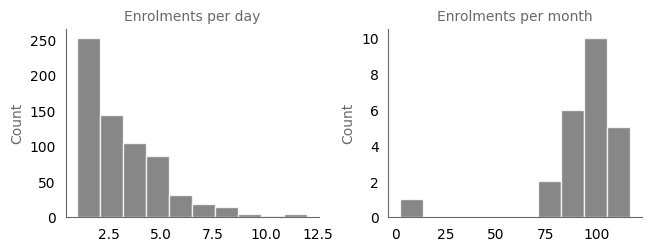

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(6.4, 4.8/2))
enrols_per_day.plot.hist(ax=axes[0], color='dimgray', alpha=0.8, edgecolor ="white")
enrols_per_month.plot.hist(ax=axes[1], color='dimgray', alpha=0.8, edgecolor ="white")

axes[0].set_title('Enrolments per day', fontsize=10, color='dimgray')
axes[1].set_title('Enrolments per month', fontsize=10, color='dimgray')
for ax in axes:
    ax.set_ylabel('Count', fontsize=10, color='dimgray')
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

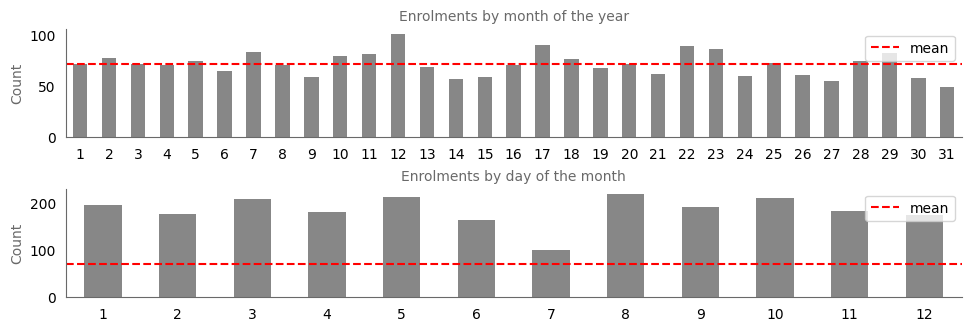

In [12]:
enrols_by_day = clean_df['Dt_Customer'].groupby(clean_df['Dt_Customer'].dt.day).count()
enrols_by_month = clean_df['Dt_Customer'].groupby(clean_df['Dt_Customer'].dt.month).count()

fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(6.4*1.5, 4.8/1.5))
enrols_by_day.plot.bar(ax=axes[0], color='dimgray', alpha=0.8, label='')
axes[0].axhline(enrols_by_day.mean(), linestyle='--', color='red', label='mean')
enrols_by_month.plot.bar(ax=axes[1], color='dimgray', alpha=0.8, label='')
axes[1].axhline(enrols_by_day.mean(), linestyle='--', color='red', label='mean')

axes[0].set_title('Enrolments by month of the year', fontsize=10, color='dimgray')
axes[1].set_title('Enrolments by day of the month', fontsize=10, color='dimgray')
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=10, color='dimgray')
    ax.tick_params(bottom=False, left=False, rotation=0)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')
    ax.legend(loc='upper right')

### Nominal variables

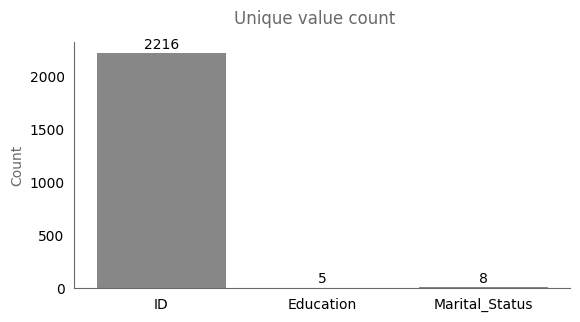

In [13]:
# Unique value count
object_nunique = clean_df.select_dtypes(include=object).nunique()
fig, axes = plt.subplots(figsize=(6.4, 4.8/1.5))
bars = axes.bar(object_nunique.index, object_nunique.values, color='dimgray', alpha=0.8)
axes.bar_label(bars, padding=1);
axes.set_ylabel('Count', fontsize=10, color='dimgray')
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
fig.suptitle('Unique value count', color='dimgray');

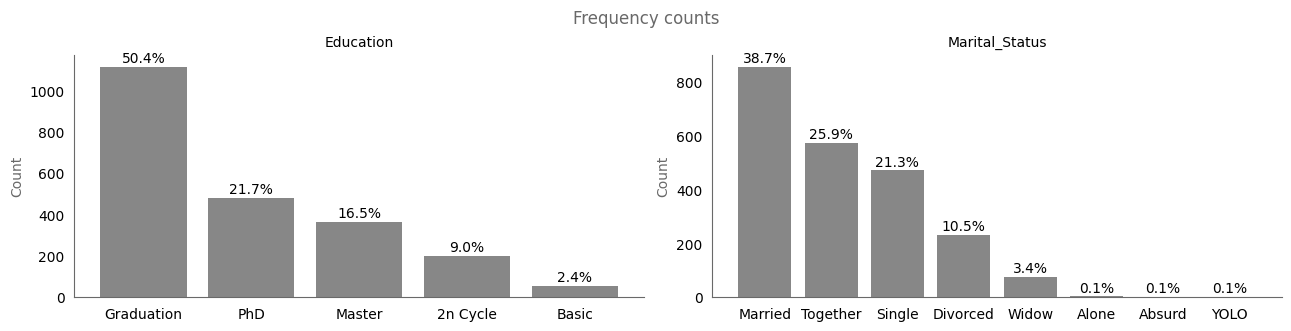

In [14]:
# Frequency count
object_cols = ['Education', 'Marital_Status']
fig, axes = plt.subplots(
    nrows=1, ncols=2, constrained_layout=True, figsize=(6.4*2, 4.8/1.5))
for ax, col in zip(axes, object_cols):
    freq = perc_func(clean_df, col)
    bar_labels = [str(x)+'%' for x in freq['perc'].values]
    bars = ax.bar(freq.index, freq['count'], color='dimgray', alpha=0.8)
    ax.bar_label(bars, bar_labels, padding=1)
    ax.set_ylabel('Count', fontsize=10, color='dimgray')
    ax.set_title(f"{col}", fontsize=10)
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')
fig.suptitle('Frequency counts', color='dimgray');

### Boolean variables

*People:*
* ***Complain (nominal/boolean):*** Complained in the last 2 years (1/0 = yes/no)

*Promotion:*
* ***AcceptedCmp1 (nominal/boolean):*** Accepted offer in the 1st campaign (1/0 = yes/no)
* ***AcceptedCmp2 (nominal/boolean):*** Accepted offer in the 2nd campaign (1/0 = yes/no)
* ***AcceptedCmp3 (nominal/boolean):*** Accepted offer in the 3rd campaign (1/0 = yes/no)
* ***AcceptedCmp4 (nominal/boolean):*** Accepted offer in the 4th campaign (1/0 = yes/no)
* ***AcceptedCmp5 (nominal/boolean):*** Accepted offer in the 5th campaign (1/0 = yes/no)
* ***Response (nominal/boolean):*** Accepted offer in the last campaign (1/0 = yes/no)

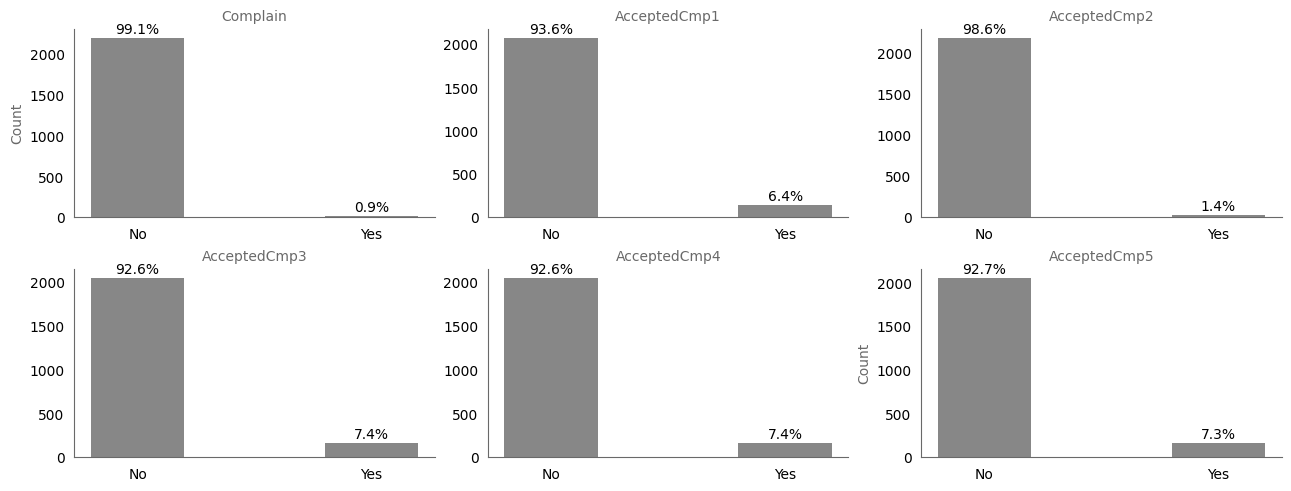

In [15]:
bool_cols = ['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

fig, axes = plt.subplots(
    nrows=2, ncols=3, constrained_layout=True, figsize=(6.4*2, 4.8))
axes = axes.flatten()
axes[0].set_ylabel('Count', fontsize=10, color='dimgray')
axes[5].set_ylabel('Count', fontsize=10, color='dimgray')

for ax, col in zip(axes, bool_cols):
    freq = perc_func(clean_df, col)
    bar_labels = [str(x) + '%' for x in freq['perc'].values]
    bars = ax.bar(freq.index, freq['count'], color='dimgray', alpha=0.8, width=0.4)
    xtick_positions = [0, 1]
    xtick_labels = ['No', 'Yes']
    ax.bar_label(bars, bar_labels, padding=1)
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')
    ax.set_xticks(xtick_positions, xtick_labels)
    ax.set_title(f"{col}", fontsize=10, color='dimgray')

### Numerical variables

**People**
* ***Income (numerical):*** Annual household income
* ***Kidhome (numerical):*** No. of children in the household
* ***Teenhome (numerical):*** No. of teens in the household
* ***Recency (numerical):*** No. of days since last purchase

In [16]:
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency']
clean_df[num_cols].describe()

,Income,Kidhome,Teenhome,Recency
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635
std,25173.076661,0.536896,0.544181,28.948352
min,1730.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000
50%,51381.500000,0.000000,0.000000,49.000000
75%,68522.000000,1.000000,1.000000,74.000000
max,666666.000000,2.000000,2.000000,99.000000


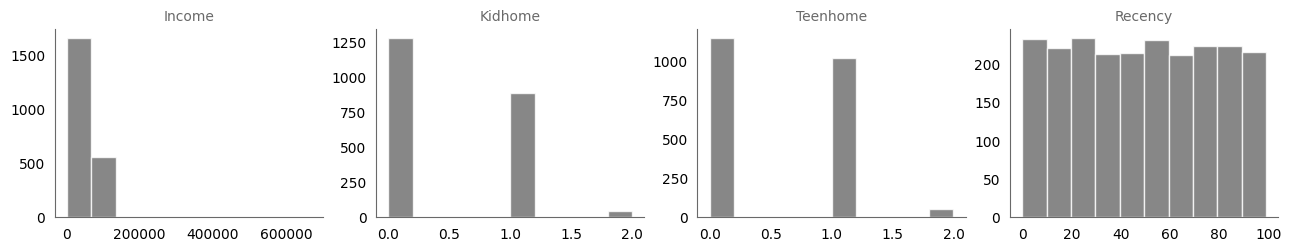

In [17]:
fig, axes = plt.subplots(
    nrows=1, ncols=4, constrained_layout=True, figsize=(6.4*2, 4.8/2))
axes = axes.flatten()
for ax, col in zip(axes, num_cols):
    bars = ax.hist(clean_df[col], color='dimgray', alpha=0.8, edgecolor ="white")
    ax.set_title(f"{col}", fontsize=10, color='dimgray')
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

**Products**
* ***MntWines (numerical):*** Expenditure on wine in last 2 years
* ***MntFruits (numerical):*** Expenditure on fruits in the last 2 years
* ***MntMeatProducts (numerical):*** Expenditure on meat in the last 2 years
* ***MntFishProducts (numerical):*** Expenditure on fish in the last 2 years
* ***MntSweetProducts (numerical):*** Expenditure on sweets in the last 2 years
* ***MntGoldProds (numerical):*** Expenditure on gold in the last 2 years

In [18]:
num_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
clean_df[num_cols].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


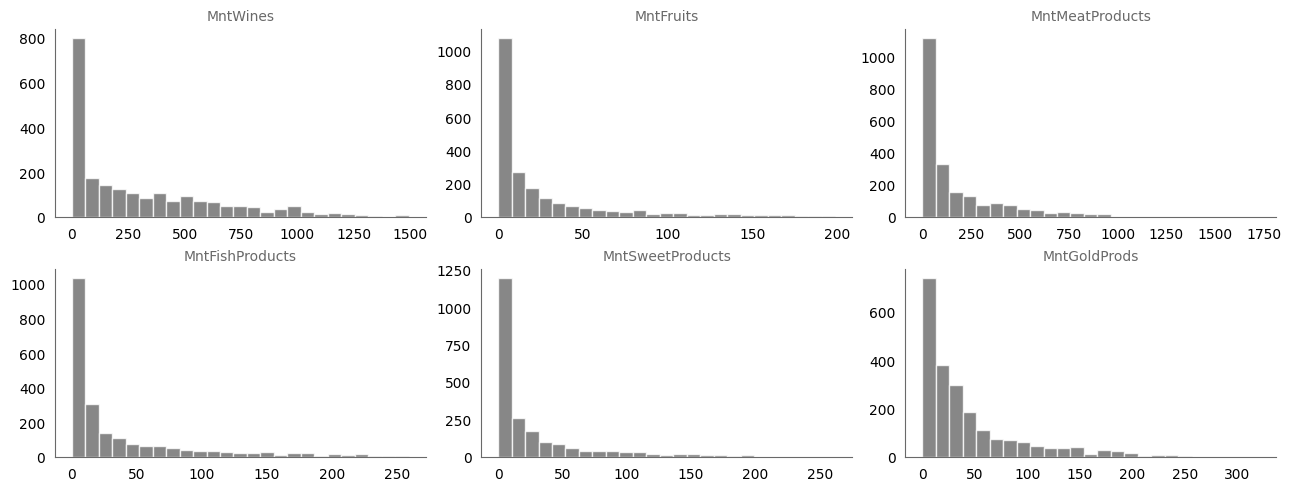

In [19]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, constrained_layout=True, figsize=(6.4*2, 4.8))
axes = axes.flatten()
for ax, col in zip(axes, num_cols):
    bars = ax.hist(clean_df[col], bins=25, color='dimgray', alpha=0.8, edgecolor='white')
    ax.set_title(f"{col}", fontsize=10, color='dimgray')
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

**Promotion & place**
* ***NumDealsPurchases (numerical):*** No. of purchases made with a discount
* ***NumWebPurchases (numerical):*** No. of purchases via website
* ***NumCataloguePurchases (numerical):*** No. of purchases via catalogue
* ***NumStorePurchases (numerical):*** No. of purchases in store
* ***NumWebVisitsMonth (numerical):*** No. of visits to website in the last month

In [20]:
num_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
clean_df[num_cols].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.323556,4.085289,2.671029,5.800993,5.319043
std,1.923716,2.740951,2.926734,3.250785,2.425359
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000


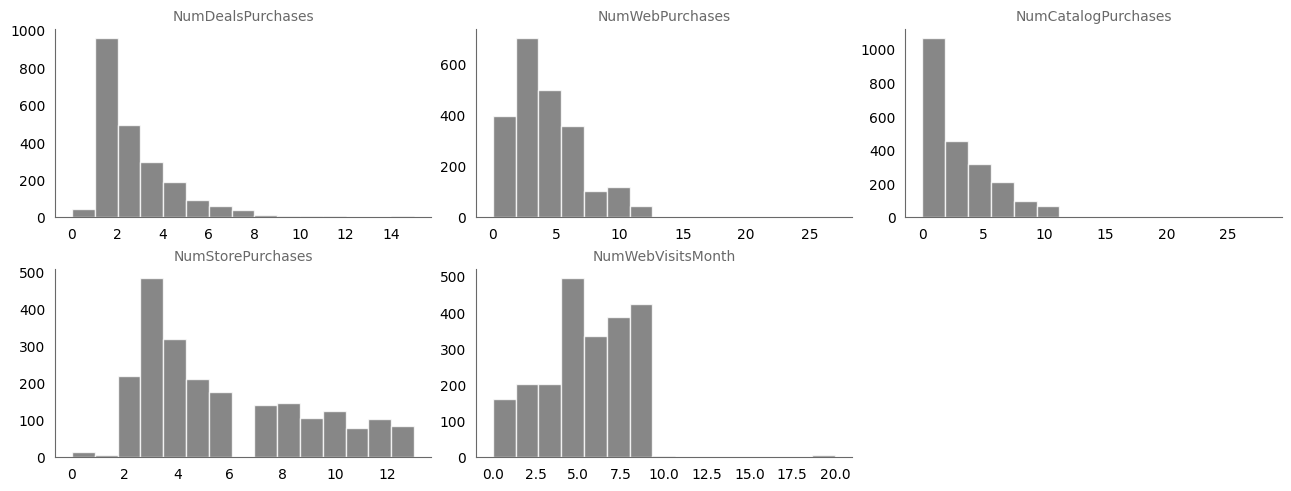

In [21]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, constrained_layout=True, figsize=(6.4*2, 4.8))
axes = axes.flatten()
for ax, col in zip(axes, num_cols):
    bars = ax.hist(clean_df[col], bins=15, color='dimgray', alpha=0.8, edgecolor='white')
    ax.set_title(f"{col}", fontsize=10, color='dimgray')
    ax.tick_params(bottom=False, left=False)
    ax.grid(False)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')
fig.delaxes(axes[5])

## Correlation

Scatter chart matrix for numerical variables

Correlation matrices:
* Non-parameteric test for numerical-numerical correlation
* Cramer's V for categorical-categorical correlation
* ANOVA for categorical-numerical variables or point biserial correlation

### Numerical-numerical
* Matrix of scatter plots
* Heatmap showing spearman's correlation

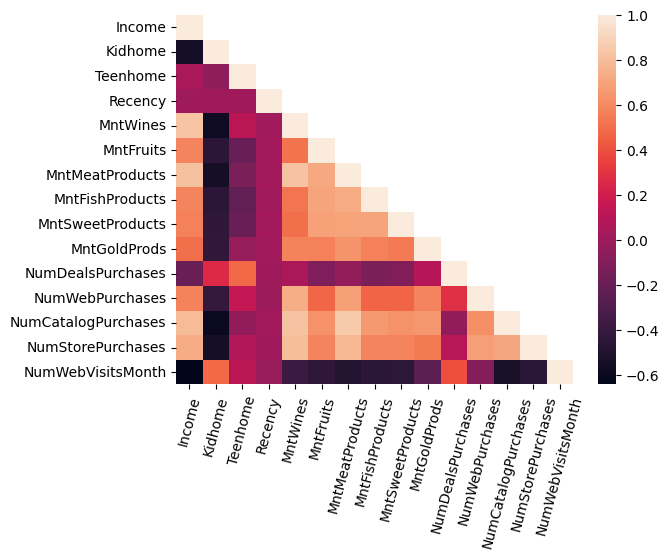

In [22]:
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
spearmans_corr = clean_df[num_cols].corr(method='spearman')
num_mask = np.tril(spearmans_corr) == 0

fig, axes = plt.subplots(figsize=(6.4, 4.8))
sns.heatmap(spearmans_corr, mask=num_mask, ax=axes)
xtick_labels = [item.get_text() for item in axes.get_xticklabels()]
axes.set_xticklabels(xtick_labels, rotation=75);

### Categorical-categorical
* Heatmap showing spearman's correlation

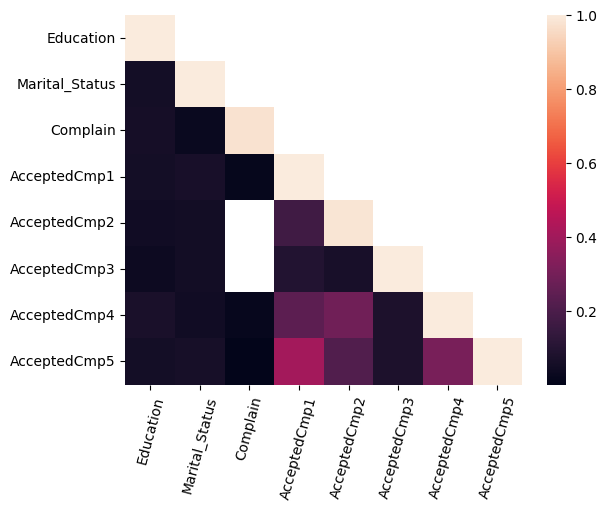

In [23]:
def cramers_v(vars, df):
    var1, var2 = vars
    contigency_table = pd.crosstab(index=df[var1],
                                   columns=df[var2])
    X2 = scipy.stats.chi2_contingency(contigency_table)
    chi_stat = X2[0]
    N = len(df)
    min_dim = (min(contigency_table.shape)-1)
    return np.sqrt((chi_stat/N) / min_dim)


object_cols = ['Education', 'Marital_Status', 'Complain', 'AcceptedCmp1',
               'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cramersv_corr = pd.DataFrame([[(row, col) for row in object_cols]
                        for col in object_cols], columns=object_cols, index=object_cols)
cramersv_corr = cramersv_corr.map(lambda x: cramers_v(x, df=clean_df))
cat_mask = np.tril(cramersv_corr) == 0

fig, axes = plt.subplots(figsize=(6.4, 4.8))
sns.heatmap(cramersv_corr, mask=cat_mask, ax=axes)
xtick_labels = [item.get_text() for item in axes.get_xticklabels()]
axes.set_xticklabels(xtick_labels, rotation=75);

### Categorical-numerical
* Boxplots of numerical variable when split by category value
* Heatmap showing point biserial correlation
* Heatmap showing anova p-value - adjust heatmap show this highlights p-values below 0.05

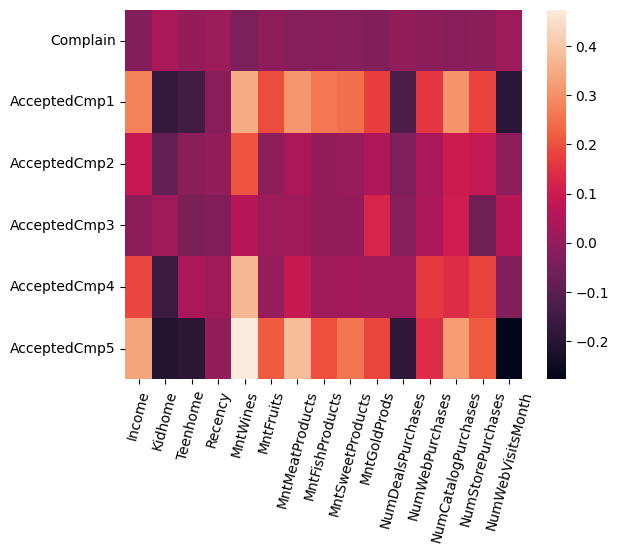

In [24]:
def point_bs(vars, df):
    var1, var2 = vars
    res = scipy.stats.pointbiserialr(df[var1], df[var2])
    return res.statistic


pbs_corr = pd.DataFrame([[(row, col) for col in num_cols]
                        for row in bool_cols], columns=num_cols, index=bool_cols)
pbs_corr = pbs_corr.map(lambda x: point_bs(x, df=clean_df))

fig, axes = plt.subplots(figsize=(6.4, 4.8))
sns.heatmap(pbs_corr, ax=axes)
xtick_labels = [item.get_text() for item in axes.get_xticklabels()]
axes.set_xticklabels(xtick_labels, rotation=75);

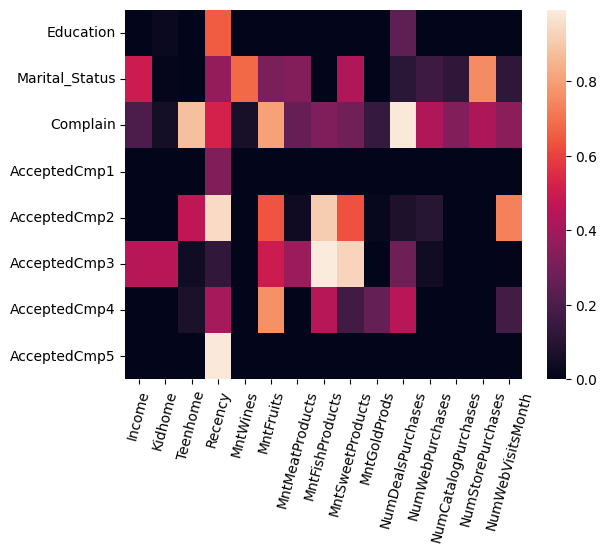

In [25]:
from scipy.stats import f_oneway

def oneway_anova(vars, df):
    cat, num = vars
    res = f_oneway(*tuple(
        [df[num].groupby(df[cat]).get_group(val) for val in df[cat].unique()]))
    return res.pvalue


anova_corr = pd.DataFrame([[(row, col) for col in num_cols]
                        for row in object_cols], columns=num_cols, index=object_cols)
anova_corr = anova_corr.map(lambda x: oneway_anova(x, df=clean_df))

fig, axes = plt.subplots(figsize=(6.4, 4.8))
sns.heatmap(anova_corr, ax=axes)
xtick_labels = [item.get_text() for item in axes.get_xticklabels()]
axes.set_xticklabels(xtick_labels, rotation=75);

# Data cleansing
* Outliers
* Missing values

# Feature engineering

# Model selection & training

# Model evaluation